In [206]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
from sklearn.metrics import mean_squared_error
#Importing data

df=pd.read_csv('monthly-milk-production-pounds-p (1).csv', index_col=['Month'],
              parse_dates=['Month'])
df = df.dropna()
df.size

168

In [207]:

#Creating train and test set 
split_point=len(df) - 12
train=df[0:split_point]
test=df[split_point:]
train.tail()

,MilkProd
Month,
1974-08,867.0
1974-09,815.0
1974-10,812.0
1974-11,773.0
1974-12,813.0


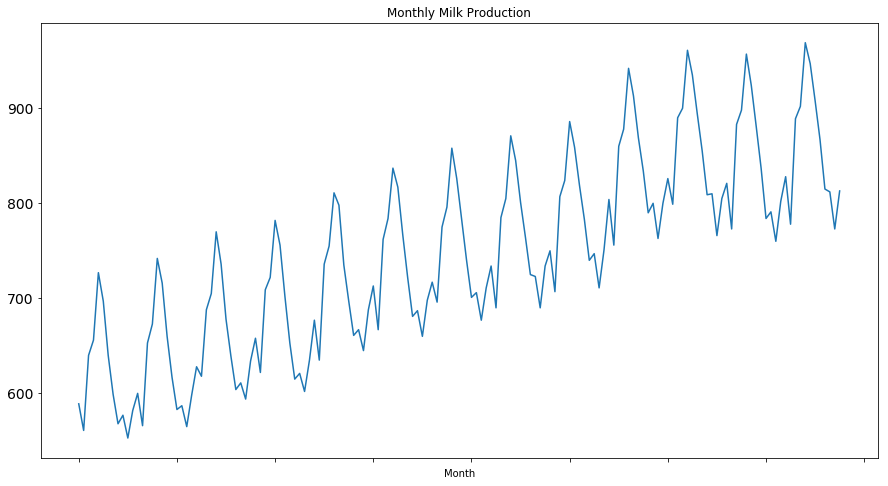

In [208]:
#Visualize training data
train.MilkProd.plot(figsize=(15,8), title= 'Monthly Milk Production', fontsize=14)
#test.MilkProd.plot(figsize=(15,8), title= 'Monthly Milk Production', fontsize=14)
plt.show()

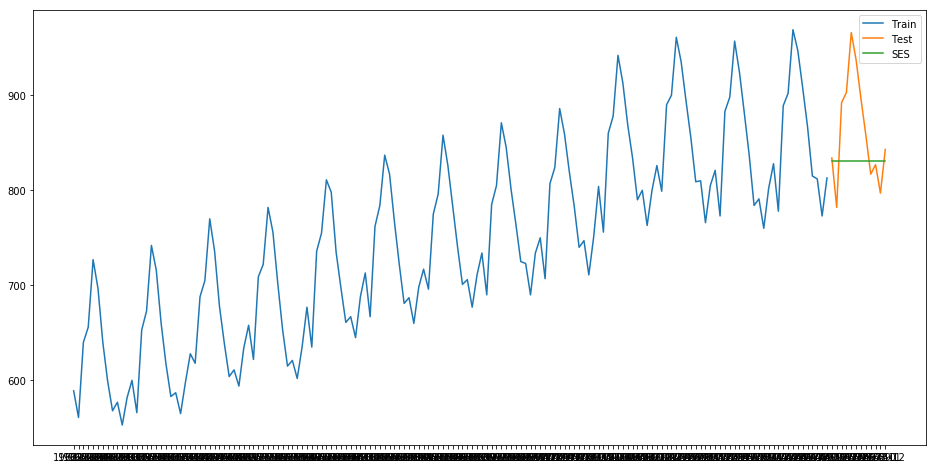

>Predicted=830.360, Expected=834, RMSE=2.574
>Predicted=830.360, Expected=782, RMSE=34.196
>Predicted=830.360, Expected=892, RMSE=43.586
>Predicted=830.360, Expected=903, RMSE=51.364
>Predicted=830.360, Expected=966, RMSE=95.912
>Predicted=830.360, Expected=937, RMSE=75.406
>Predicted=830.360, Expected=896, RMSE=46.414
>Predicted=830.360, Expected=858, RMSE=19.544
>Predicted=830.360, Expected=817, RMSE=9.447
>Predicted=830.360, Expected=827, RMSE=2.376
>Predicted=830.360, Expected=797, RMSE=23.589
>Predicted=830.360, Expected=843, RMSE=8.938
63.069530497629785


In [209]:


def h_rmse(prediction, target):
    s = sqrt(((prediction - target) ** 2)/2)
    return s


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(df['MilkProd'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

#pred_values = fit2.forecast(len(test))

for a in test['MilkProd']:
    for p in y_hat_avg['SES']:
        rmse=h_rmse(p,a)
        
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (p, a, rmse))
        
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.SES))
print(rms)





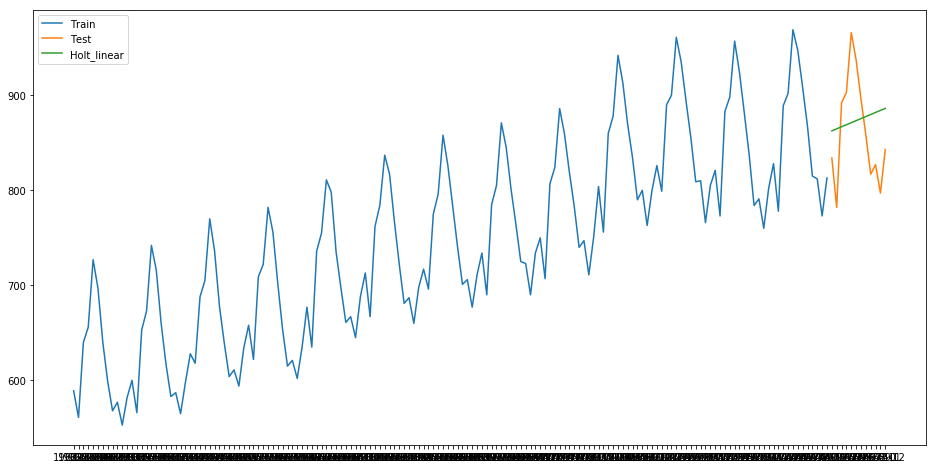

>Predicted=886.193, Expected=834, RMSE=36.906
>Predicted=886.193, Expected=782, RMSE=73.676
>Predicted=886.193, Expected=892, RMSE=4.106
>Predicted=886.193, Expected=903, RMSE=11.884
>Predicted=886.193, Expected=966, RMSE=56.432
>Predicted=886.193, Expected=937, RMSE=35.926
>Predicted=886.193, Expected=896, RMSE=6.934
>Predicted=886.193, Expected=858, RMSE=19.936
>Predicted=886.193, Expected=817, RMSE=48.927
>Predicted=886.193, Expected=827, RMSE=41.856
>Predicted=886.193, Expected=797, RMSE=63.069
>Predicted=886.193, Expected=843, RMSE=30.542
57.516049295465855


In [210]:
#HOLT'S LINEAR TREND
#This technique takes into account trend and maps the trend without any assumptions.
#Previous techniques can be applied to trend too but Naive approach for example would assume that trend between the last two points is going to stay the same.

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['MilkProd'])).fit(smoothing_level = 0.012,smoothing_slope = 0.022)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()
for a in test['MilkProd']:
    for p in y_hat_avg['Holt_linear']:
        rmse=h_rmse(p,a)
        
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (p, a, rmse))
        
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.Holt_linear))
print(rms)


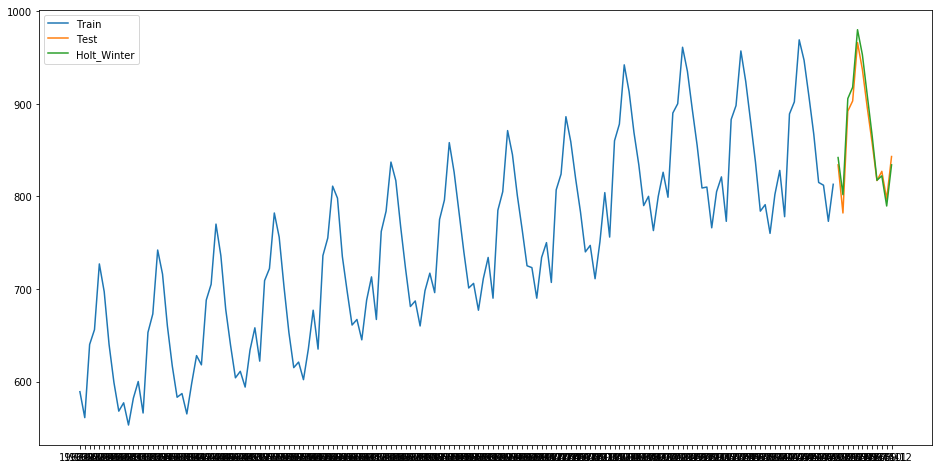

>Predicted=833.999, Expected=834, RMSE=0.001
>Predicted=833.999, Expected=782, RMSE=36.769
>Predicted=833.999, Expected=892, RMSE=41.013
>Predicted=833.999, Expected=903, RMSE=48.791
>Predicted=833.999, Expected=966, RMSE=93.339
>Predicted=833.999, Expected=937, RMSE=72.833
>Predicted=833.999, Expected=896, RMSE=43.841
>Predicted=833.999, Expected=858, RMSE=16.971
>Predicted=833.999, Expected=817, RMSE=12.020
>Predicted=833.999, Expected=827, RMSE=4.949
>Predicted=833.999, Expected=797, RMSE=26.162
>Predicted=833.999, Expected=843, RMSE=6.365
11.92265963764379


In [211]:
#HOLT-WINTERS
#This method has a seasonality factor.
#It comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['MilkProd']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
for a in test['MilkProd']:
    for p in y_hat_avg['Holt_Winter']:
        rmse=h_rmse(p,a)
        
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (p, a, rmse))
        
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.Holt_Winter))
print(rms)